# **Jacob Shearer - Excercise set 5**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

**Question 1:**

Part (a):
<br/>
Newton's second law has the following vector form:
$$f^{(0)} = y^{(1)}(t)$$
$$f^{(1)} = \frac{1}{m}F(t, y^{(0)}, y^{(1)})$$
<br/>
where $y^{(0)}$ is the object's position as a function of time and $y^{(1)}$ is the objects's velocity as a function of time. For the case of a projectile under the influence of gravity and a quadratic drag force, the force $F$ is given by:
<br/>
$$\frac{dp}{dt} = F = mg-kv^2 = mg-k(y^{(1)})^2$$
<br/>
and therefore:
$$f^{(0)} = y^{(1)}(t)$$
$$f^{(1)} = g-\frac{k}{m}(y^{(1)})^2$$

In [2]:
def rk4_vector(start, stop, min_step_num, eq_vector, initial_state, min_precision=None):
    vector_len = len(initial_state)
    t = start
    y = initial_state
    h = (stop-start)/min_step_num
    h_min = h/64
    tt = np.array([t])
    yy = list()
    for i in range(vector_len):
        yy.append(np.array([y[i]]))


    def stepper(test_h, num_steps):
        dummy_y = np.zeros(vector_len)
        test_t = t
        test_y = [0, 0]
        for i in range(vector_len):
            test_y[i] = y[i]
        
        test_tt = np.array([])
        test_yy = list()
        for i in range(vector_len):
            test_yy.append(np.array([]))
    
        k1 = np.zeros(vector_len)
        k2 = np.zeros(vector_len)
        k3 = np.zeros(vector_len)
        k4 = np.zeros(vector_len)
        for step in range(num_steps):
            function_return = eq_vector(test_y, test_t)
            for i in range(vector_len):
                k1[i] = test_h * function_return[i]
                dummy_y[i] = test_y[i] + k1[i]/2
        
            function_return = eq_vector(dummy_y, test_t + test_h/2)
            for i in range(vector_len):
                k2[i] = test_h * function_return[i]
                dummy_y[i] = test_y[i] + k2[i]/2

            function_return = eq_vector(dummy_y, test_t + test_h/2)
            for i in range(vector_len):
                k3[i] = test_h * function_return[i]
                dummy_y[i] = test_y[i] + k3[i]

            function_return = eq_vector(dummy_y, test_t + test_h)
            for i in range(vector_len):
                k4[i] = test_h * function_return[i]
                test_y[i] = test_y[i] + (k1[i] + 2*(k2[i] + k3[i]) + k4[i])/6

            test_t += test_h
            test_tt = np.append(test_tt, test_t)
            for i in range(vector_len):
                test_yy[i] = np.append(test_yy[i], test_y[i])

        return test_tt, test_yy
    

    if min_precision is not None:  # Adaptive step size algorithm
        while t < stop:
            if (t+h) > stop:
                h = stop - t
                current_tt, current_yy = stepper(h, 1)
                y = [current_yy[0][-1], current_yy[1][-1]]
                t = current_tt[-1]
                tt = np.append(tt, current_tt)
                for i in range(vector_len):
                    yy[i] = np.append(yy[i], current_yy[i])

                break

            proposed_factor = 2
            while True:
                proposed_h = h*1/proposed_factor
                current_h = proposed_h * 2
                current_tt, current_yy = stepper(current_h, int(proposed_factor/2))
                test_tt, test_yy = stepper(proposed_h, int(proposed_factor))
                if np.abs(current_yy[1][-1] - test_yy[1][-1]) > min_precision and proposed_h > h_min:
                    proposed_factor *= 2
                    continue
                else:
                    y = [current_yy[0][-1], current_yy[1][-1]]
                    t = current_tt[-1]
                    h = current_h
                    tt = np.append(tt, current_tt)
                    for i in range(vector_len):
                        yy[i] = np.append(yy[i], current_yy[i])

                    break
    
    else:  # Runs if no minimum precision is specified (i.e. no adaptive step size)
        while t < stop:
            if (t+h) > stop:
                h = stop - t
            
            current_tt, current_yy = stepper(h, 1)
            y = [current_yy[0][-1], current_yy[1][-1]]
            t = current_tt[-1]
            tt = np.append(tt, current_tt)
            for i in range(vector_len):
                yy[i] = np.append(yy[i], current_yy[i])
  
    results = [tt]
    for i in range(vector_len):
        results.append(yy[i])
           
    return results

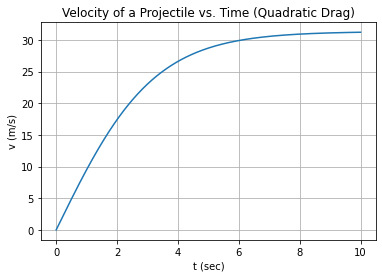

In [3]:
def quad_drag(y, t):
    g = 9.81
    k = 1e-4
    m = 1e-2
    function_return = np.zeros(len(y))
    function_return[0] = y[1]
    function_return[1] = g - (k/m)*(y[1]**2)
    return function_return


initial_conditions = [0, 0]
ode_results = rk4_vector(0, 10, 1000, quad_drag, initial_conditions, min_precision=0.00001)

plt.plot(ode_results[0], ode_results[2])
plt.xlabel('t (sec)')
plt.ylabel('v (m/s)')
plt.grid(True)
plt.title('Velocity of a Projectile vs. Time (Quadratic Drag)')
plt.show()

Part (b):
<br/>
When $k = 0$, the velocity is simply given by $ v = gt$

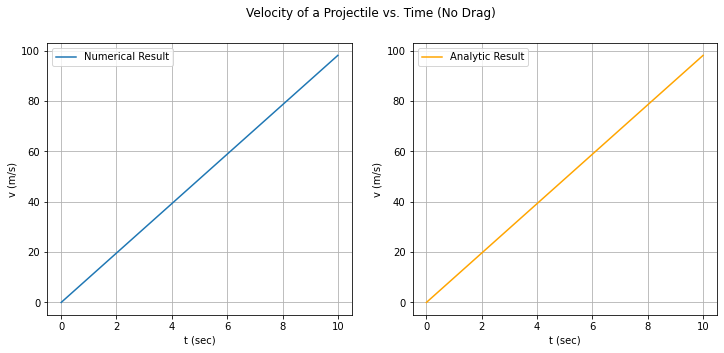

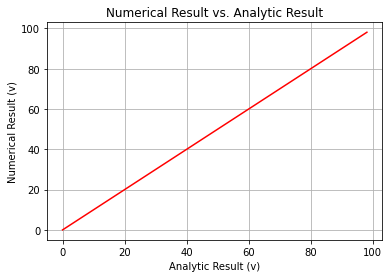

The average difference between the numerical and analytic results is 1.0504454923995681e-12.
So, the analytic result and the numerical result appear to line up pretty much perfectly.


In [4]:
def no_drag(y, t):
    g = 9.81
    k = 0
    m = 1e-2
    function_return = np.zeros(len(y))
    function_return[0] = y[1]
    function_return[1] = g - (k/m)*(y[1]**2)
    return function_return


initial_conditions = [0, 0]
ode_results1 = rk4_vector(0, 10, 1000, no_drag, initial_conditions, min_precision=0.00001)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
ax1.plot(ode_results1[0], ode_results1[2], label='Numerical Result')
ax1.set_xlabel('t (sec)')
ax1.set_ylabel('v (m/s)')
ax1.grid(True)
ax1.legend()

ax2.plot(ode_results1[0], 9.81*ode_results1[0], label='Analytic Result', color='orange')
ax2.set_xlabel('t (sec)')
ax2.set_ylabel('v (m/s)')
ax2.grid(True)
ax2.legend()

fig.suptitle('Velocity of a Projectile vs. Time (No Drag)')
plt.show()

plt.plot(9.81*ode_results1[0], ode_results1[2], color='red')
plt.xlabel('Analytic Result (v)')
plt.ylabel('Numerical Result (v)')
plt.title('Numerical Result vs. Analytic Result')
plt.grid(True)
plt.show()

average_error = np.sum(np.abs(9.81*ode_results1[0] - ode_results1[2]))/len(ode_results1[0])
print(f'The average difference between the numerical and analytic results is {average_error}.')

print('So, the analytic result and the numerical result appear to line up pretty much perfectly.')

**Question 2:**

Part (a):
<br/>
For potentials of this form, 
$$f^{(0)} = y^{(1)}(t)$$
<br/>
$$f^{(1)} = \frac{-k(y^{(0)})^{p-1}}{m}$$

In [5]:
def hook_2(y, t):
    k = 1
    m = 1
    p = 2
    function_return = [0, 0]
    function_return[0] = y[1]
    function_return[1] = (-k*y[0]**(p-1))/m
    return function_return


def hook_4(y, t):
    k = 1
    m = 1
    p = 4
    function_return = [0, 0]
    function_return[0] = y[1]
    function_return[1] = (-k*y[0]**(p-1))/m
    return function_return


def hook_8(y, t):
    k = 1
    m = 1
    p = 8
    function_return = [0, 0]
    function_return[0] = y[1]
    function_return[1] = (-k*y[0]**(p-1))/m
    return function_return

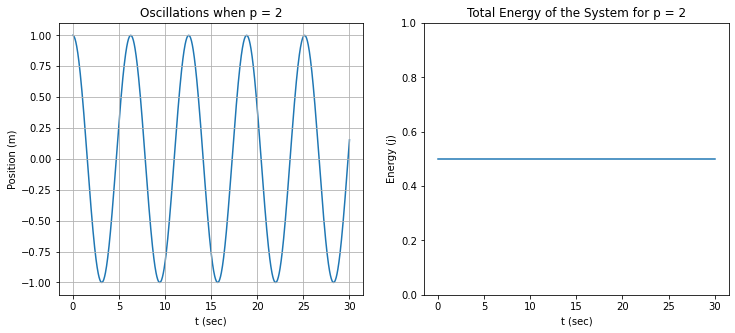

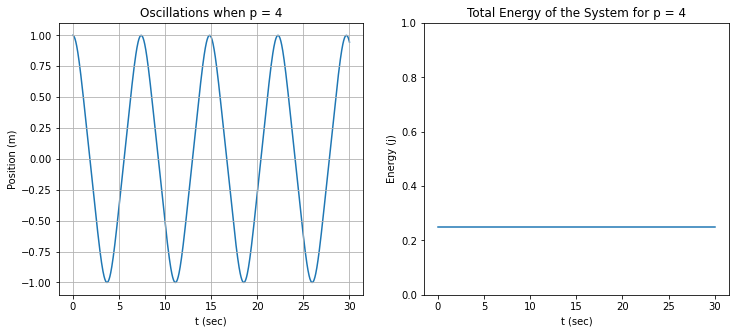

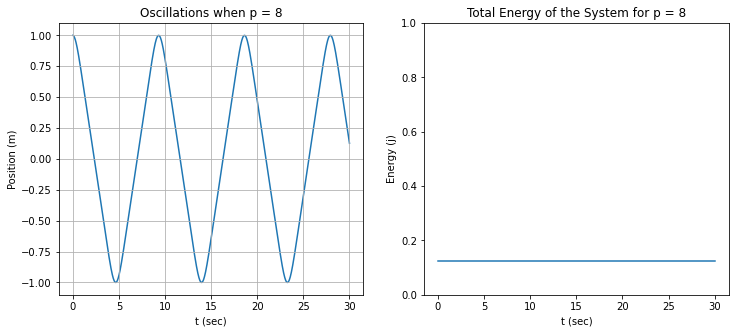

In [6]:
func_list = [hook_2, hook_4, hook_8]
p = 2
for func in func_list:
    m = 1
    k = 1
    initial_conditions = [1, 0]
    ode_results = rk4_vector(0, 30, 1000, func, initial_conditions)
    
    fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
    ax1.plot(ode_results[0], ode_results[1], zorder=1)
    ax1.set_xlabel('t (sec)')
    ax1.set_ylabel('Position (m)')
    ax1.grid(True)
    ax1.set_title(f'Oscillations when p = {p}')
    
    energy = (1/2)*m*ode_results[2]**2 + (1/p)*k*ode_results[1]**p
    ax2.plot(ode_results[0], energy)
    ax2.set_xlabel('t (sec)')
    ax2.set_ylabel('Energy (j)')
    ax2.set_ylim(0, 1)
    ax2.set_title(f'Total Energy of the System for p = {p}')
    
    plt.show()
    p *= 2

The energy plots for each of the three p values are constant throughout the 30 second time period, and therefore energy is conserved throughout systems' oscillation.

Part (b):


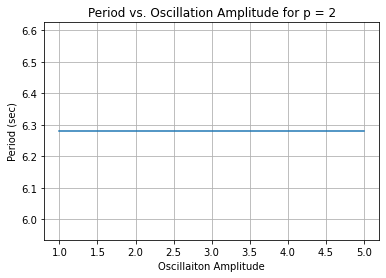

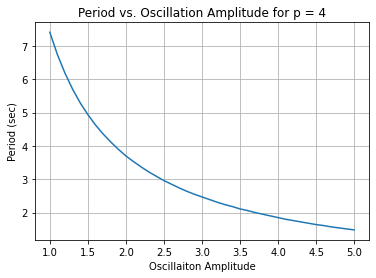

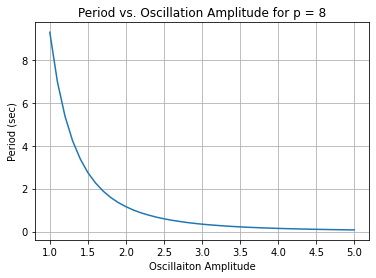

In [8]:
# Part (b):
print('Part (b):')
amplitudes = np.arange(1, 5.1, 0.1)
func_list = [hook_2, hook_4, hook_8]
p = 2
for func in func_list:
    period_array = []
    for amplitude in amplitudes:
        initial_conditions = [amplitude, 0]
        ode_results = rk4_vector(0, 30, 1000, func, initial_conditions, min_precision=0.01)
        times = ode_results[0]
        velocities = ode_results[2]
        velocity_sign = np.sign(velocities)
        changes = np.where(np.diff(velocity_sign) == -2)  # Looking for the ends of cycles by looking for sign changes in v
        period = times[changes[0][2]]/3
        period_array.append(period)
    
    plt.plot(amplitudes, period_array)
    plt.xlabel('Oscillaiton Amplitude')
    plt.ylabel('Period (sec)')
    plt.title(f'Period vs. Oscillation Amplitude for p = {p}')
    plt.grid(True)
    plt.show()
    p *= 2

**Question 3:**

Part (a):
<br/>
With a driving force $F_{\text{ext}}(t) = F_0 sin(\omega t)$,
$$f^{(0)} = y^{(1)}(t)$$
<br/>
$$f^{(1)} = \frac{-k(y^{(0)})^{p-1} + F_0 sin(\omega t)}{m}$$
<br/>
where $\omega$ is the driving frequency and, for this part of the question, $p = 2$.

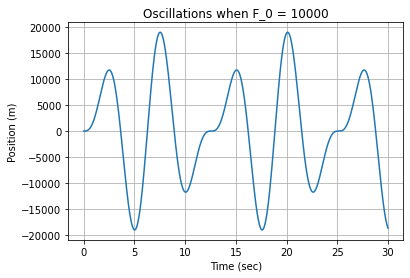

In [9]:
k = 1
m = 1
F_0 = 10000
w = 1.5
def hook_2_driven(state, t):
    p = 2
    function_return = [0, 0]
    function_return[0] = state[1]
    function_return[1] = (-k*state[0]**(p-1) + F_0*np.sin(w*t))/m
    return function_return


initial_conditions = [1, 0]
driven_osc_results = rk4_vector(0, 30, 1000, hook_2_driven, initial_conditions)

plt.plot(driven_osc_results[0], driven_osc_results[1])
plt.xlabel('Time (sec)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.title('Oscillations when F_0 = 10000')
plt.show()

Part (b):


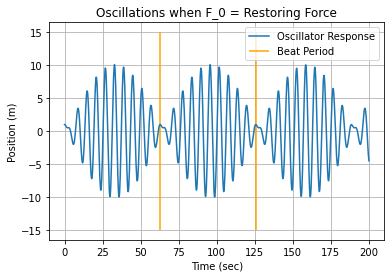

In [10]:
# Part (b):
k = 1
m = 1
w_0 = np.sqrt(k/m)
F_0 = 1
w = 1.1
w_beat = (w-w_0)/(2*np.pi)
def hook_2_driven(state, t):
    p = 2
    function_return = [0, 0]
    function_return[0] = state[1]
    function_return[1] = (-k*state[0]**(p-1) + F_0*np.sin(w*t))/m
    return function_return


print('Part (b):')
initial_conditions = [1, 0]
driven_osc_results = rk4_vector(0, 200, 1000, hook_2_driven, initial_conditions)

plt.plot(driven_osc_results[0], driven_osc_results[1], label='Oscillator Response')
plt.vlines([1/w_beat, 2/w_beat], -15, 15, label='Beat Period', color='orange')
plt.xlabel('Time (sec)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend()
plt.title('Oscillations when F_0 = Restoring Force')
plt.show()

I've chosen $\omega = 1.1$ as the frequency for the driving force, which yields a beat frequency of 0.0159154943, and therefore a period of $T = 1/f = 62.83185307$. As the plot above shows, lines drawn at one and two times this period respectively line up with the valleys between the beats perfectly, and therefore the beat frequency is in fact given by $\omega_b = (\omega - \omega_0)/2\pi$.

Part (c):


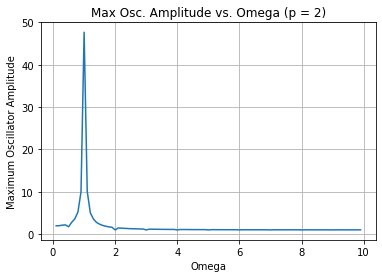

In [11]:
# Part (c):
print('Part (c):')
omega_array = np.arange(1/10, 10, 0.1)
max_amp_array = np.array([])
dt = 0.05
t = np.arange(0, 100, dt)
initial_conditions = [1, 0]
k = 1
m = 1
F_0 = 1
for w in omega_array:
    def hook_2_driven(state, t):
        p = 2
        function_return = [0, 0]
        function_return[0] = state[1]
        function_return[1] = (-k*state[0]**(p-1) + F_0*np.sin(w*t))/m
        return function_return
    
    
    driven_osc_results = rk4_vector(0, 100, 1000, hook_2_driven, initial_conditions)
    max_amp = np.amax(driven_osc_results[1])
    max_amp_array = np.append(max_amp_array, max_amp)
    
    
plt.plot(omega_array, max_amp_array)
plt.xlabel('Omega')
plt.ylabel('Maximum Oscillator Amplitude')
plt.grid(True)
plt.title('Max Osc. Amplitude vs. Omega (p = 2)')
plt.show()

There appears to be a peak at $\omega = 1$, which is the natural frequency of the oscillator in this case. This makes sense: if the driving force is forcing the oscillator at it's natural frequency, then it's essentially just adding energy to the oscillation (rather than removing some ocasionally), and thus the amplitude of the oscillations increases.

Part (d):


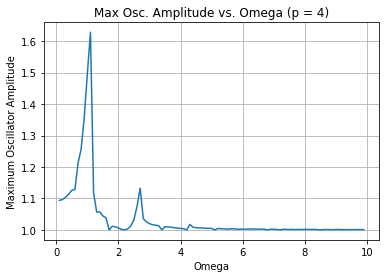

In [12]:
# Part (d):
print('Part (d):')
omega_array1 = np.arange(1/10, 10, 0.1)
max_amp_array1 = np.array([])
dt = 0.05
t = np.arange(0, 100, dt)
initial_conditions = [1, 0]
k = 1
m = 1
F_0 = 0.1
for w in omega_array1:
    def hook_4_driven(state, t):
        p = 4
        function_return = [0, 0]
        function_return[0] = state[1]
        function_return[1] = (-k*state[0]**(p-1) + F_0*np.sin(w*t))/m
        return function_return
    
    
    driven_osc_results = rk4_vector(0, 100, 1000, hook_4_driven, initial_conditions)
    max_amp = np.amax(driven_osc_results[1])
    max_amp_array1 = np.append(max_amp_array1, max_amp)
    
    
plt.plot(omega_array1, max_amp_array1)
plt.xlabel('Omega')
plt.ylabel('Maximum Oscillator Amplitude')
plt.grid(True)
plt.title('Max Osc. Amplitude vs. Omega (p = 4)')
plt.show()

Rather than having only a single peak at the natural frequency, the anharmonic oscillator has several (smaller) peaks. Evidently, the oscillator can be driven into an ever-increasing oscillation amplitude at several different driving frequencies. 